## Migración - vocación permanencia
Elaborado por Ivan Gabriel Corredor Castillo

IMMAP-GIFMM

ivangcorredorc@gmail.com

30-06-2023

In [1]:
### librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#print(sns.__version__)
#!pip3 install seaborn --upgrade
plt.style.use('seaborn')
#sns.set_style('white')
import matplotlib.ticker as ticker
#import dtale

In [2]:
coding: "latin-1"

#### Importe de bases de datos

In [3]:
pd.options.display.float_format = '{:.1f}'.format 
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
# rutas 
p1 = "G:/Mi unidad/IMMAP/migración/datos/1_raw/"

In [5]:
# importar pestañas
pestaña = ["Colombia_trimestre", "Colombia_mes"]
tabla = ["col_trim", "col_mes"]

for i, j in zip(pestaña, tabla):
    df1 = pd.read_excel(p1 + "VARIABLES_PROYECCIONES_23-06-2023_V1_SIN_FORMATO.xlsx",     
                       sheet_name = i, header = 0)
    exec(f'{j} = df1')

In [39]:
col_trim.head()

,TEMPORALIDAD,PIB,TASA_CRE_PIB_TRIM,TASA_CRE_PIB_ANUAL_TRIME_REFER,IPC_VAR,IPC_ÍNDICE,TRM_EEUU,INFLACIÓN_ANUAL_TRIM_REFER,POBLACIÓN_COL,PET,PIB_PERCAP,PIB_PET,VEN_GEIH_IMPU_TRIM,VEN_GEIH_IMPU_mmov_TRIM
0,2014-01-01,193291.6,1.3,6.1,1.5,80.8,2004.1,2.5,44758774.0,33327643.3,4318518.6,5799737.9,21375.6,17598.2
1,2014-02-01,194297.4,0.5,4.0,1.0,81.6,1913.6,2.8,44862472.3,33456532.3,4330956.4,5807458.1,37844.1,27453.7
2,2014-03-01,195878.6,0.8,4.2,0.5,82.0,1909.1,2.9,44964559.3,33582488.0,4356288.4,5832759.9,17185.5,25935.3
3,2014-04-01,198121.4,1.1,3.8,0.6,82.5,2173.7,3.7,45070684.0,33713019.3,4395793.2,5876703.1,31300.2,25702.3
4,2015-01-01,198873.3,0.4,2.9,2.4,84.5,2469.3,4.6,45178371.7,33843601.0,4401959.0,5876246.4,48226.2,31329.8


In [10]:
col_trim.columns

Index(['TEMPORALIDAD', 'PIB', 'TASA_CRE_PIB_TRIM',
       'TASA_CRE_PIB_ANUAL_TRIME_REFER', 'IPC_VAR', 'IPC_ÍNDICE', 'TRM_EEUU',
       'INFLACIÓN_ANUAL_TRIM_REFER', 'POBLACIÓN_COL', 'PET', 'PIB_PERCAP',
       'PIB_PET', 'VEN_GEIH_IMPU_TRIM', 'VEN_GEIH_IMPU_mmov_TRIM'],
      dtype='object')

### Correlaciones

In [ ]:
col_trim.rename(columns={'VEN_GEIH_IMPU_mmov_TRIM':'migrantes',
                                 'TASA_CRE_PIB_ANUAL_TRIME_REFER':'T_PIB_TRIM_REF', 
                                 'INFLACIÓN_ANUAL_TRIM_REFER':'INFLA_TRIM_REF',
                                'PIB_PET':'PIB_PET', 'PIB_PERCAP':'PIB_PERCAP'}, inplace=True)

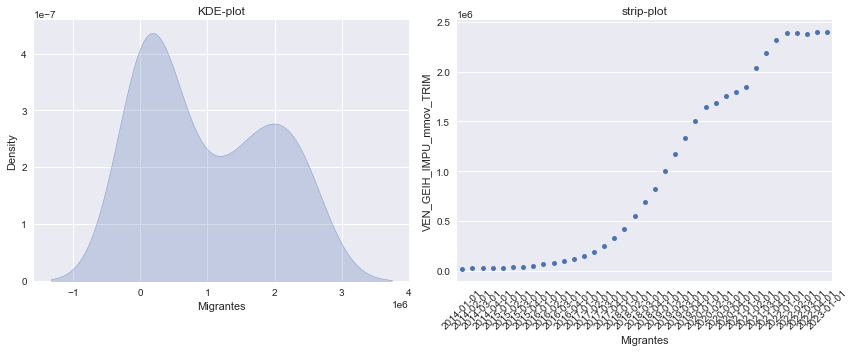

In [41]:
#import matplotlib.dates as mdates
# Sector
# Create the subplots
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# kde plot
sns.kdeplot(x="VEN_GEIH_IMPU_mmov_TRIM", data=col_trim,
             fill=True, ax=ax0)
ax0.set_title("KDE-plot")
ax0.set_xlabel("Migrantes")

# strip plot
sns.stripplot(y="VEN_GEIH_IMPU_mmov_TRIM",x="TEMPORALIDAD", data=col_trim, jitter=True, ax=ax1)
ax1.set_title("strip-plot")
ax1.set_xlabel("Migrantes")

# Rotate x-axis tick labels if needed
plt.xticks(rotation=45)
# Adjust the layout to avoid overlapping of plot elements
plt.tight_layout()
plt.show()
# sns.histplot(x="VEN_GEIH_IMPU_mmov_TRIM", data=col_trim,
#              kde=False, bins=10
#              , ax=ax1)
# ax1.set_title("Histograma")
# ax1.set_xlabel("migrantes")

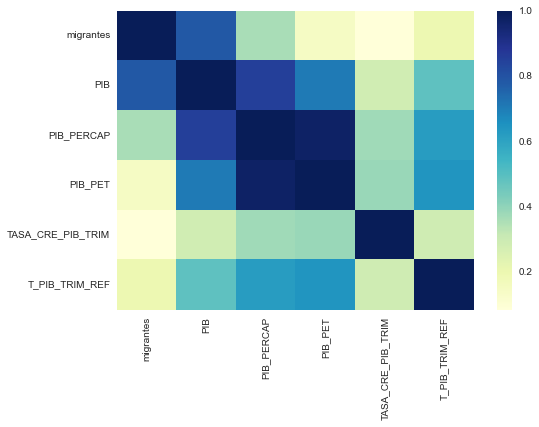

In [77]:
cols= [ 'migrantes', 'PIB', 'PIB_PERCAP',
       'PIB_PET', 'TASA_CRE_PIB_TRIM', 'T_PIB_TRIM_REF']

#'VEN_GEIH_IMPU_TRIM',
#'VEN_GEIH_IMPU_mmov_TRIM'
sns.heatmap(col_trim[cols].corr(), cmap="YlGnBu")

## correlación entre VEN_GEIH_IMPU_mmov_TRIM y 'PIB', 'PIB_PERCAP'

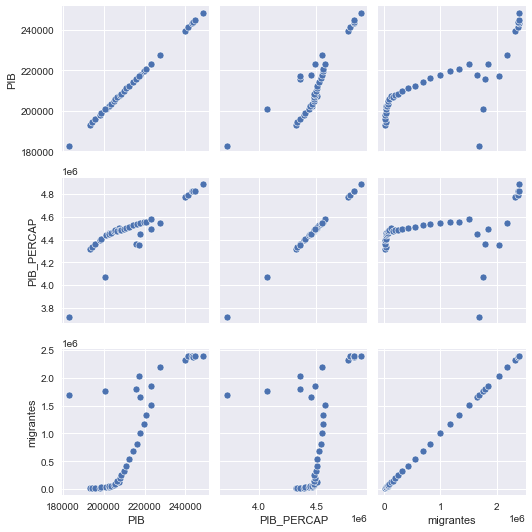

In [78]:
g= sns.PairGrid(col_trim, vars=['PIB', 'PIB_PERCAP', 'migrantes'])
g = g.map(sns.scatterplot)
# Adjust the layout to avoid overlapping of plot elements
plt.tight_layout()
plt.show()

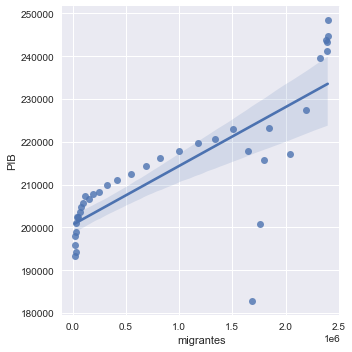

In [79]:
#reg 'VEN_GEIH_IMPU_mmov_TRIM', y='PIB'
sns.lmplot(data=col_trim, x='migrantes', y='PIB')
plt.show()

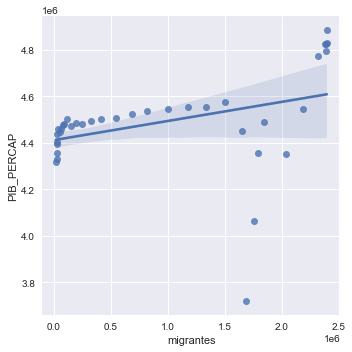

In [80]:
sns.lmplot(data=col_trim, x='migrantes', y='PIB_PERCAP')
plt.show()

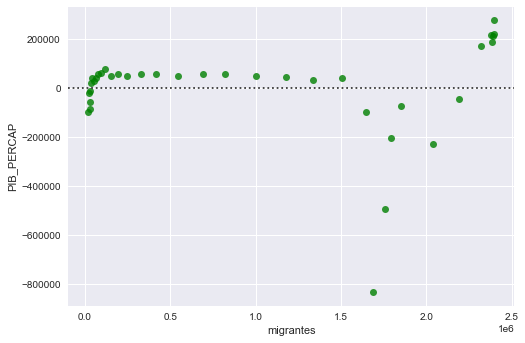

In [93]:
sns.residplot(data=col_trim, x='migrantes', y='PIB_PERCAP', color ='g')
plt.show()

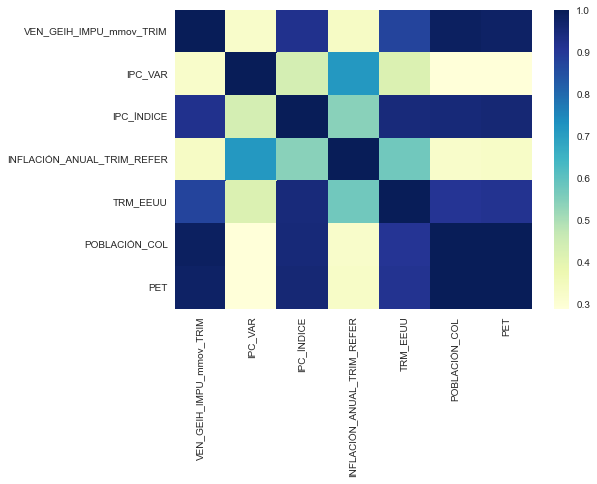

In [17]:
cols= ['VEN_GEIH_IMPU_mmov_TRIM', 'IPC_VAR', 'IPC_ÍNDICE',
      'INFLACIÓN_ANUAL_TRIM_REFER',  'TRM_EEUU', 'POBLACIÓN_COL', 'PET']
sns.heatmap(col_trim[cols].corr(), cmap="YlGnBu")
#'VEN_GEIH_IMPU_TRIM'
#'VEN_GEIH_IMPU_mmov_TRIM'
#correlación entre 'VEN_GEIH_IMPU_mmov_TRIM' y 'IPC_ÍNDICE' y 'POBLACIÓN_COL', 'PET', TRM_EEUU

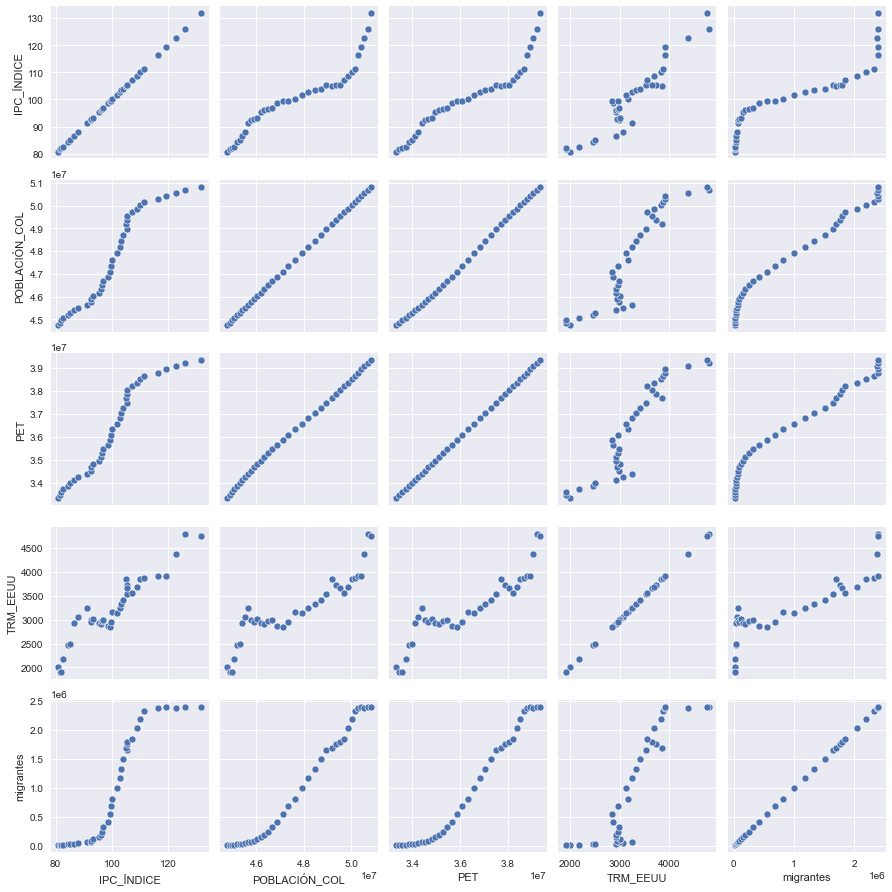

In [75]:
g= sns.PairGrid(col_trim, vars=['IPC_ÍNDICE', 'POBLACIÓN_COL',
                                'PET', 'TRM_EEUU','migrantes'])
g = g.map(sns.scatterplot)
# Adjust the layout to avoid overlapping of plot elements
plt.tight_layout()
plt.show()

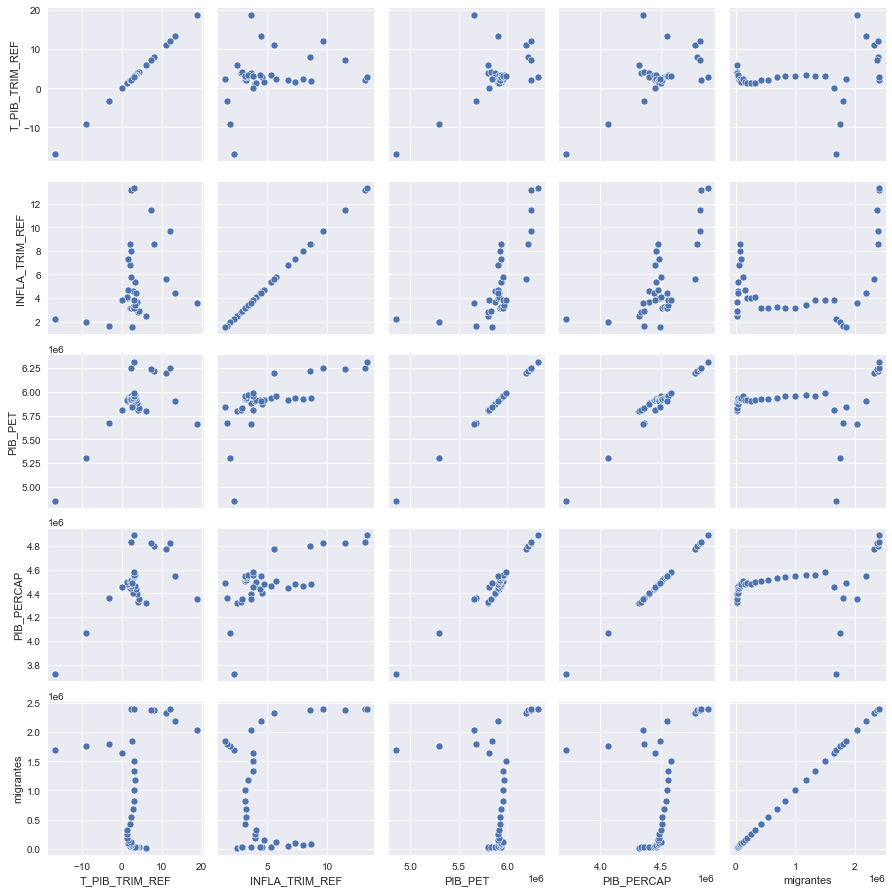

In [72]:
g= sns.PairGrid(col_trim, vars=['T_PIB_TRIM_REF', 'INFLA_TRIM_REF',
                                'PIB_PET', 'PIB_PERCAP','migrantes'])
g = g.map(sns.scatterplot)
# Adjust the layout to avoid overlapping of plot elements
plt.tight_layout()
plt.show()

In [70]:
col_trim.columns

Index(['TEMPORALIDAD', 'PIB', 'TASA_CRE_PIB_TRIM', 'T_PIB_TRIM_REF', 'IPC_VAR',
       'IPC_ÍNDICE', 'TRM_EEUU', 'INFLA_TRIM_REF', 'POBLACIÓN_COL', 'PET',
       'PIB_PERCAP', 'PIB_PET', 'VEN_GEIH_IMPU_TRIM', 'migrantes'],
      dtype='object')

### Mensual

In [81]:
col_mes.columns

Index(['TEMPORALIDAD', 'IPC_VAR', 'IPC_ÍNDICE', 'INFLACIÓN_ANUAL_MES_REFER',
       'ISE_ÍNDICE', 'ISE_VARIACIÓN_MENSUAL', 'ISE_VARIACIÓN_ANUAL_MES_REFER',
       'ISE_VARIACIÓN_ANUAL_AÑO_CORRIDO', 'TRM_COL/EEUU_MES',
       'VEN_GEIH_IMPU_MES', 'VEN_GEIH_IMPU_MMOV_MES'],
      dtype='object')

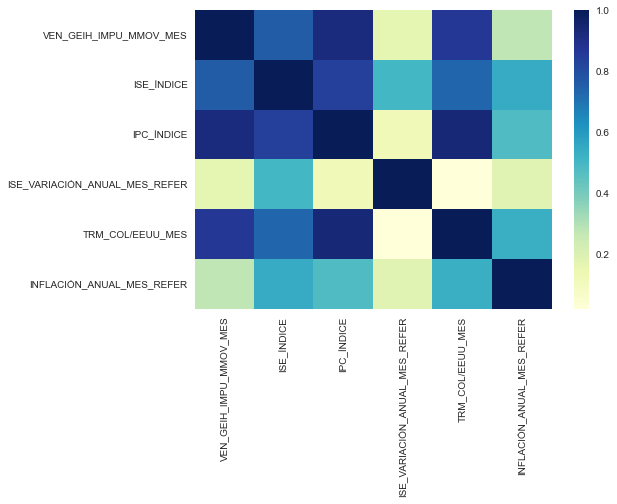

In [91]:
cols= ['VEN_GEIH_IMPU_MMOV_MES',  'ISE_ÍNDICE', 'IPC_ÍNDICE',
       'ISE_VARIACIÓN_ANUAL_MES_REFER', 'TRM_COL/EEUU_MES','INFLACIÓN_ANUAL_MES_REFER' ]

#'VEN_GEIH_IMPU_TRIM',
#'VEN_GEIH_IMPU_mmov_TRIM'
sns.heatmap(col_mes[cols].corr(), cmap="YlGnBu")


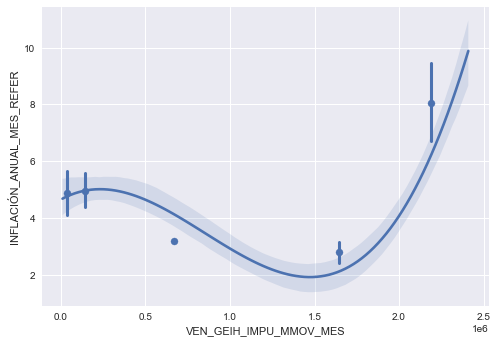

In [114]:
#reg 'VEN_GEIH_IMPU_mmov_TRIM', y='PIB'
sns.regplot(data=col_mes, x='VEN_GEIH_IMPU_MMOV_MES', y='INFLACIÓN_ANUAL_MES_REFER', x_bins=5,
           order=3)
plt.show()

In [ ]:
#reg 'VEN_GEIH_IMPU_mmov_TRIM', y='PIB'
sns.lmplot(data=col_trim, x='migrantes', y='PIB')
plt.show()

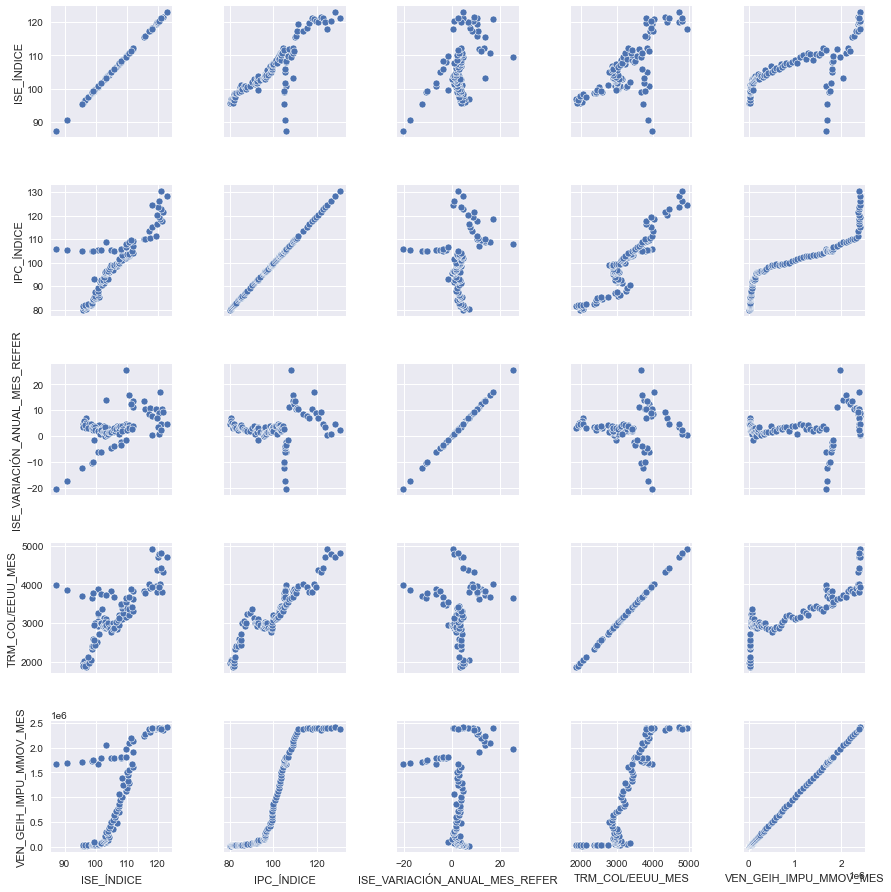

In [86]:
g= sns.PairGrid(col_mes, vars=['ISE_ÍNDICE', 'IPC_ÍNDICE',
       'ISE_VARIACIÓN_ANUAL_MES_REFER', 'TRM_COL/EEUU_MES', 'VEN_GEIH_IMPU_MMOV_MES'])
g = g.map(sns.scatterplot)
# Adjust the layout to avoid overlapping of plot elements
plt.tight_layout()
plt.show()

### importe de fuente de datos migración

In [7]:
#importar datos
ETPV = pd.read_csv(p1 + "pre_registros_estatuto_temp_ven.csv")

In [17]:
ETPV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424769 entries, 0 to 2424768
Data columns (total 7 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   SEXO                     object
 1   RANGO_EDAD               object
 2   DEPARTAMENTO_RESIDENCIA  object
 3   DEPARTAMENTO_DIVIPOLA    int64 
 4   AÑO                      int64 
 5   MES                      object
 6   CANTIDAD                 int64 
dtypes: int64(3), object(4)
memory usage: 129.5+ MB


In [8]:
ETPV.head()

,SEXO,RANGO_EDAD,DEPARTAMENTO_RESIDENCIA,DEPARTAMENTO_DIVIPOLA,AÑO,MES,CANTIDAD
0,Femenino,0 a 7 años,En Revisión,9999,2021,Mayo,1
1,Femenino,0 a 7 años,Bogotá D.C.,11,2021,Mayo,1
2,Femenino,0 a 7 años,Bogotá D.C.,11,2021,Mayo,1
3,Femenino,0 a 7 años,Bogotá D.C.,11,2021,Mayo,1
4,Femenino,0 a 7 años,Bogotá D.C.,11,2021,Mayo,1


In [14]:
ETPV.groupby(["AÑO","MES"]).aggregate({"CANTIDAD":np.sum})

CANTIDAD
AÑO  MES                 
2021 Agosto        138665
     Diciembre      82165
     Julio         106551
     Junio         213168
     Mayo          747239
     Noviembre     135176
     Octubre       136387
     Septiembre    135461
2022 Abril          97624
     Agosto          6132
     Diciembre       5467
     Enero         121845
     Febrero       133551
     Julio           3978
     Junio           4154
     Marzo         128368
     Mayo          204900
     Noviembre       8492
     Octubre         7449
     Septiembre      7997

In [15]:
ETPV["CANTIDAD"].sum()

2424769

In [16]:
ETPV.groupby(["AÑO"]).aggregate({"CANTIDAD":np.sum})

,CANTIDAD
AÑO,
2021,1694812
2022,729957


In [17]:
###registro de entradas de extranjeros a colombia
ext_col = pd.read_csv(p1 + "entradas_ext_colombia.csv", decimal =",") 

In [19]:
ext_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127173 entries, 0 to 127172
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Año                 127173 non-null  int64  
 1   Mes                 127173 non-null  object 
 2   Nacionalidad        127173 non-null  object 
 3   Codigo Iso 3166     127173 non-null  object 
 4   Femenino            127173 non-null  object 
 5   Masculino           127173 non-null  object 
 6   Indefinido          0 non-null       float64
 7   Total               127173 non-null  object 
 8   Latitud - Longitud  127173 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 8.7+ MB


In [18]:
ext_col["Total"] = pd.to_numeric(ext_col["Total"], downcast="integer")

In [19]:
ext_col_ven = ext_col[ext_col["Nacionalidad"]=="Venezuela"]

In [20]:
pd.options.display.float_format = '{:.1f}'.format 
ext_col_ven.groupby(["Año", "Mes"]).aggregate({"Total":np.sum})

Total
Año  Mes              
2012 Abril      1969.0
     Agosto     2530.5
     Diciembre  1676.6
     Enero      3043.2
     Febrero    2263.0
     Julio      2219.9
     Junio      1885.7
     Marzo      2202.5
     Mayo       1923.4
     Noviembre  2492.4
     Octubre    2297.5
     Septiembre 2990.5
2013 Abril      1895.9
     Agosto     1665.9
     Diciembre  1836.7
     Enero      2913.5
     Febrero    3225.7
     Julio      1930.7
     Junio      2261.9
     Marzo      2415.5
     Mayo       2047.1
     Noviembre  2519.3
     Octubre    1960.4
     Septiembre 2405.7
2014 Abril      2226.1
     Agosto     2465.2
     Diciembre  2755.8
     Enero      2180.5
     Febrero    1990.2
     Julio      2312.8
     Junio      1796.2
     Marzo      2105.4
     Mayo       2033.3
     Noviembre  4301.1
     Octubre    3054.7
     Septiembre 2246.2
2015 Abril      3130.2
     Agosto     3857.5
     Diciembre  3146.9
     Enero      3351.8
     Febrero    3407.3
     Julio      3245.0
     Junio      3140.9
     Marzo      3655.0
     Mayo       3381.9
     Noviembre  2267.7
     Octubre    3221.2
     Septiembre 3681.8
2016 Abril      2607.8
     Agosto     2640.4
     Diciembre  2479.4
     Enero      3352.5
     Febrero    2754.7
     Julio      2189.4
     Junio      1785.8
     Marzo      2971.8
     Mayo       1711.7
     Noviembre  1330.7
     Octubre    2199.7
     Septiembre 2183.2
2017 Abril      2007.7
     Agosto     1765.4
     Diciembre  2022.7
     Enero      2804.4
     Febrero    1261.7
     Julio      1251.1
     Junio      1536.6
     Marzo      2659.2
     Mayo       1223.7
     Noviembre  1656.3
     Octubre    1506.1
     Septiembre 1389.0
2018 Abril      1319.0
     Agosto     1714.9
     Diciembre  2441.3
     Enero      2534.6
     Febrero    1393.4
     Julio      2328.6
     Junio      1447.1
     Marzo      1336.2
     Mayo       1384.1
     Noviembre  1594.9
     Octubre    1508.3
     Septiembre 1467.3
2019 Abril      3286.4
     Agosto     2798.3
     Diciembre  3054.0
     Enero      2090.7
     Febrero    1811.7
     Julio      2297.3
     Junio      2148.9
     Marzo      2975.3
     Mayo       2999.4
     Noviembre  3094.4
     Octubre    3367.6
     Septiembre 2936.8
2020 Abril        24.0
     Agosto      357.0
     Diciembre  2392.5
     Enero      3069.3
     Febrero    3294.4
     Julio        82.0
     Junio       101.0
     Marzo      2740.6
     Mayo         58.0
     Noviembre  1684.7
     Octubre    1438.5
     Septiembre  856.0
2021 Abril      2119.8
     Agosto     2262.4
     Diciembre  4174.9
     Enero      1858.8
     Febrero    1678.5
     Julio      2670.6
     Junio      2835.8
     Marzo      1879.0
     Mayo       1931.4
     Noviembre  3010.6
     Octubre    2117.2
     Septiembre 2784.6
2022 Abril      4336.5
     Agosto     3181.1
     Diciembre  2682.5
     Enero      3957.1
     Febrero    4116.2
     Julio      2602.5
     Junio      3659.0
     Marzo      3207.6
     Mayo       4197.8
     Noviembre  3238.2
     Octubre    2282.2
     Septiembre 2145.0